In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

plt.rcParams["font.family"] = "CMU Serif"
plt.rcParams["font.size"] = 14

# Load the CSV file
csv = open("data/results_250312_1456_chrome.time.csv").read().replace("\\_", "_")
df = pd.read_csv(StringIO(csv), sep=",")
df.set_index("Benchmark", inplace=True)

relative = pd.DataFrame(index=df.index)
for col in df.columns:
    if col not in ["WebPL", "WebPL (GC)"]: continue
    relative[col] = df[col] / df["SWI-Prolog"]

relativeExnref = pd.DataFrame(index=df.index)
for col in df.columns:
    if col not in ["WebPL", "WebPL (GC)", "SWI (Experimental)"]: continue
    relativeExnref[col] = df[col] / df["SWI-Prolog"]

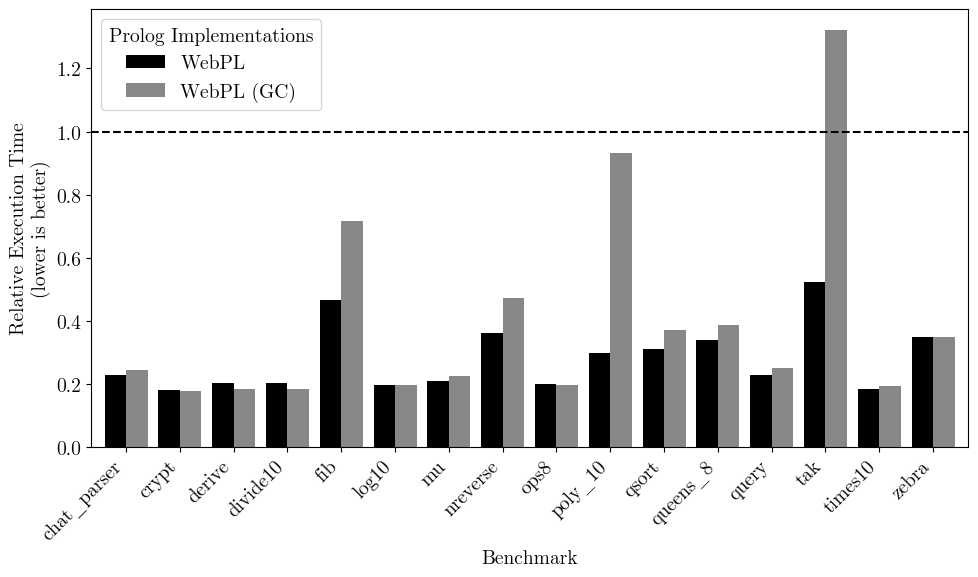

In [9]:
colours = ["#000000", "#888888"]
relative.plot(kind='bar', figsize=(10, 6), width=0.8, color=colours)
plt.axhline(y=1, color='black', linestyle='--')
plt.xlabel('Benchmark')
plt.ylabel('Relative Execution Time\n(lower is better)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Prolog Implementations')
plt.savefig("relative_performance.pdf")

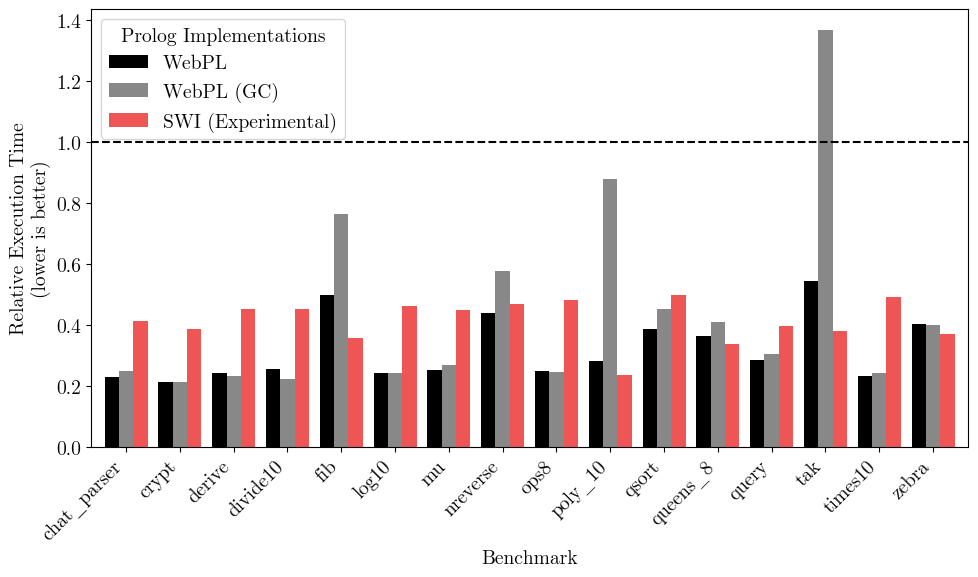

In [50]:
colours = ["#000000", "#888888", "#ee5555"]
relativeExnref.plot(kind='bar', figsize=(10, 6), width=0.8, color=colours)
plt.axhline(y=1, color='black', linestyle='--')
plt.xlabel('Benchmark')
plt.ylabel('Relative Execution Time\n(lower is better)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Prolog Implementations')
plt.savefig("relative_performance_exnref.pdf")

In [ ]:
# Load the CSV file
dfMem = pd.read_csv("../../bench/memory/results.csv")
dfMem.set_index("Benchmark", inplace=True)

relativeMem = pd.DataFrame(index=dfMem.index)
for col in dfMem.columns:
    if col not in ["WebPL", "WebPL (GC)"]: continue
    relativeMem[col] = dfMem[col] / dfMem["SWI-Prolog"]

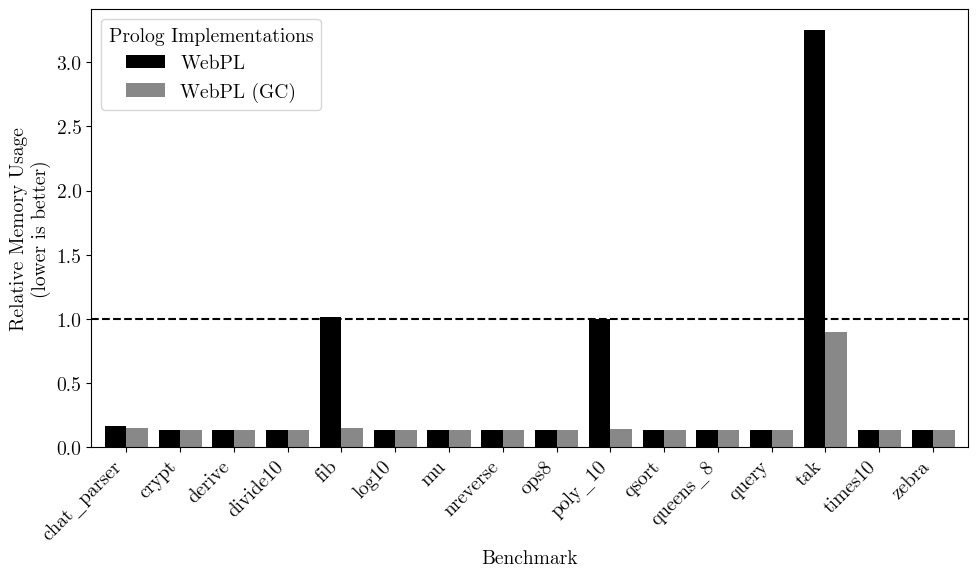

In [12]:
colours = ["#000000", "#888888"]
relativeMem.plot(kind='bar', figsize=(10, 6), width=0.8, color=colours)
plt.axhline(y=1, color='black', linestyle='--')
plt.xlabel('Benchmark')
plt.ylabel('Relative Memory Usage\n(lower is better)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Prolog Implementations')
plt.savefig("relative_memory.pdf")

In [31]:
# Load the CSV file
csv = open("data/results_250326_1137_chrome.memory.csv").read().replace("\\_", "_")
df = pd.read_csv(StringIO(csv), sep=",")
df.set_index("Benchmark", inplace=True)

relative = pd.DataFrame(index=df.index)
for col in df.columns:
    if col not in ["WebPL (GC)"]: continue
    relative[col] = df[col] / df["SWI-Prolog"]

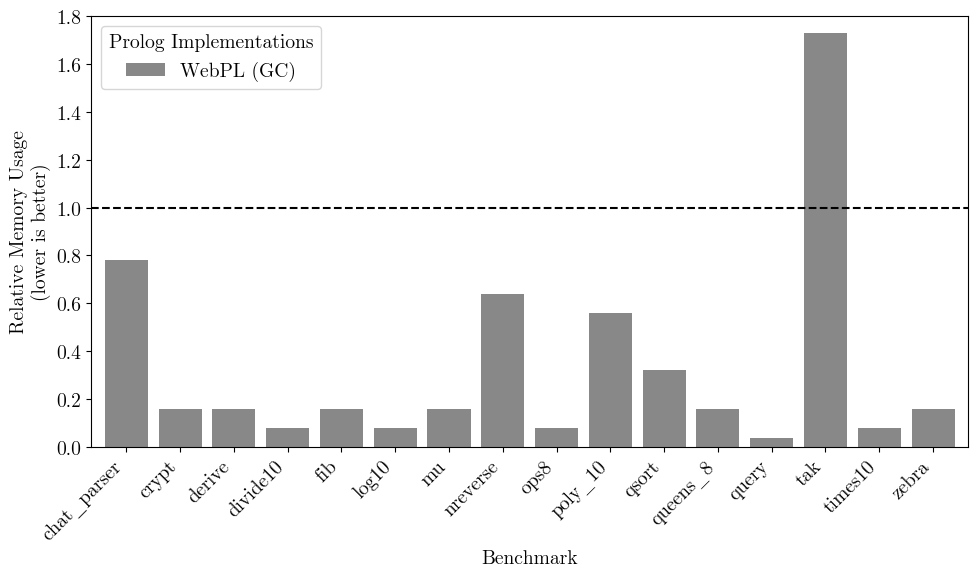

In [34]:
colours = ["#888888"]
relative.plot(kind='bar', figsize=(10, 6), width=0.8, color=colours, ylim=(0, 1.8))
plt.axhline(y=1, color='black', linestyle='--')
plt.xlabel('Benchmark')
plt.ylabel('Relative Memory Usage\n(lower is better)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Prolog Implementations')
plt.savefig("relative_memory_builtin.pdf")

In [1]:
import preprocess

In [8]:
safe, _ = preprocess.process("/Users/william/Downloads/results_safe.json")
unsafe, _ = preprocess.process("/Users/william/Downloads/results_unsafe.json")
safe = "\n".join(",".join(map(str, row)) for row in safe)
unsafe = "\n".join(",".join(map(str, row)) for row in unsafe)

In [16]:
df_safe = pd.read_csv(StringIO(safe), sep=",")
df_safe.set_index("Benchmark", inplace=True)
df_unsafe = pd.read_csv(StringIO(unsafe), sep=",")
df_unsafe.set_index("Benchmark", inplace=True)

relative = pd.DataFrame(index=df_safe.index)
for col in df_unsafe.columns:
    relative[col] = df_unsafe[col] / df_safe[col]

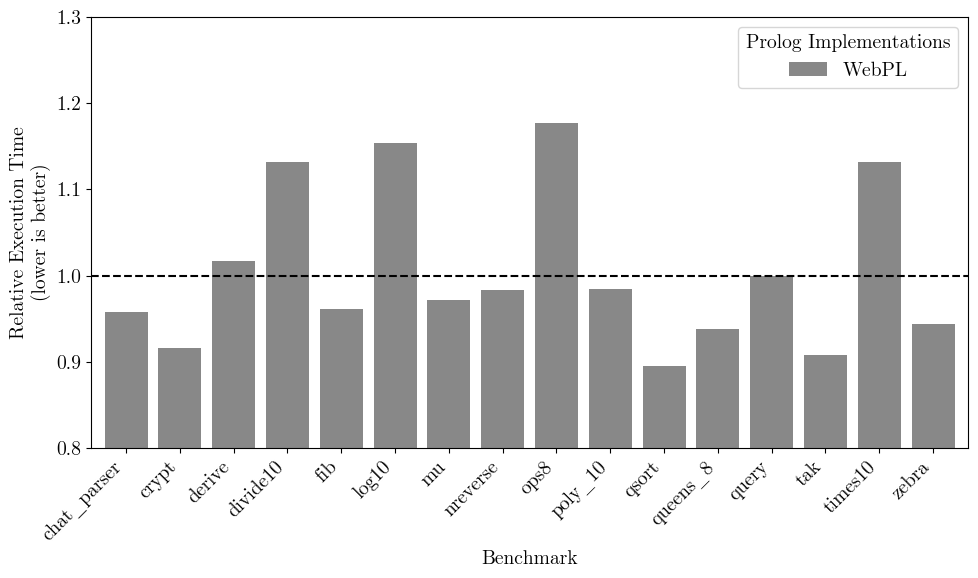

In [21]:
colours = ["#888888"]
relative.plot(kind='bar', figsize=(10, 6), width=0.8, color=colours, ylim=(0.8, 1.3))
plt.axhline(y=1, color='black', linestyle='--')
plt.xlabel('Benchmark')
plt.ylabel('Relative Execution Time\n(lower is better)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Prolog Implementations')
plt.savefig("relative_performance_unsafe.pdf")